In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 


In [11]:
df = pd.read_csv("air_quality_no2_long.csv")
df.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [12]:
df = df.rename(columns={"date.utc": "datetime"})
df.head()

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [13]:
df.dtypes

city          object
country       object
datetime      object
location      object
parameter     object
value        float64
unit          object
dtype: object

In [16]:
df["datetime"] = pd.to_datetime(df["datetime"])
print(df.dtypes)
df.head()


city                      object
country                   object
datetime     datetime64[ns, UTC]
location                  object
parameter                 object
value                    float64
unit                      object
dtype: object


,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [17]:
df["datetime"].min()

Timestamp('2019-05-07 01:00:00+0000', tz='UTC')

In [22]:
df["month"] = df["datetime"].dt.month
df.head(3)

,city,country,datetime,location,parameter,value,unit,month,year
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6,2019
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6,2019
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6,2019


In [21]:
df["year"] = df["datetime"].dt.year
df.head(
    3
)

,city,country,datetime,location,parameter,value,unit,month,year
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6,2019
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6,2019
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6,2019


In [28]:
df["hour"] = df["datetime"].dt.day
print(df.head())
hour_agg = df.groupby("hour").agg({"value": "mean"})
print(type(hour_agg))
hour_agg.head()

    city country                  datetime location parameter  value   unit  \
0  Paris      FR 2019-06-21 00:00:00+00:00  FR04014       no2   20.0  µg/m³   
1  Paris      FR 2019-06-20 23:00:00+00:00  FR04014       no2   21.8  µg/m³   
2  Paris      FR 2019-06-20 22:00:00+00:00  FR04014       no2   26.5  µg/m³   
3  Paris      FR 2019-06-20 21:00:00+00:00  FR04014       no2   24.9  µg/m³   
4  Paris      FR 2019-06-20 20:00:00+00:00  FR04014       no2   21.4  µg/m³   

   month  year  hour  
0      6  2019    21  
1      6  2019    20  
2      6  2019    20  
3      6  2019    20  
4      6  2019    20  
<class 'pandas.core.frame.DataFrame'>


,value
hour,
1,29.121739
2,28.962500
3,21.320833
4,26.597917
5,22.916327


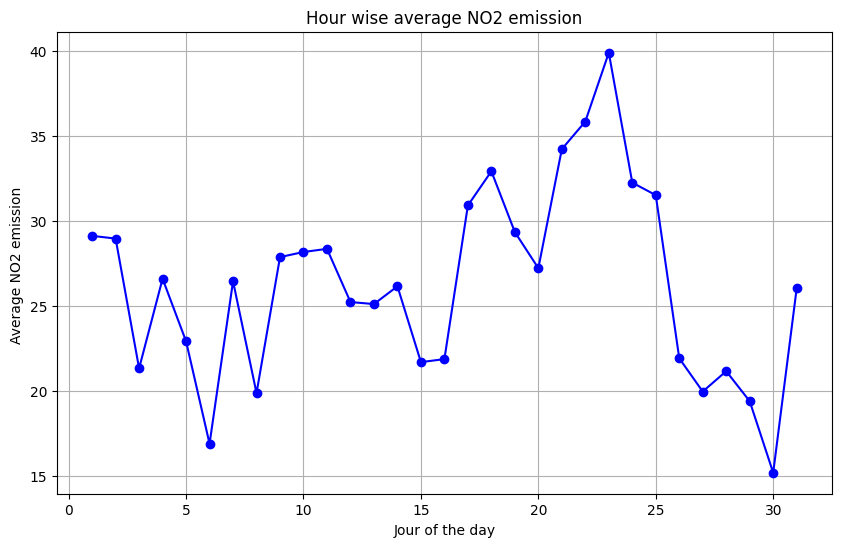

In [29]:
plt.figure(figsize=(10,6))
plt.plot(hour_agg.index, hour_agg["value"], marker = 'o', linestyle="-", color="b")
plt.title("Hour wise average NO2 emission")
plt.xlabel("Jour of the day")
plt.ylabel("Average NO2 emission ")
plt.grid(True)
plt.show()

In [30]:
df["location"].unique()

array(['FR04014', 'BETR801', 'London Westminster'], dtype=object)

In [31]:
no_2 = pd.pivot_table(df, index="datetime", columns="location", values="value")
no_2.head(3)

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0


<Axes: xlabel='datetime'>

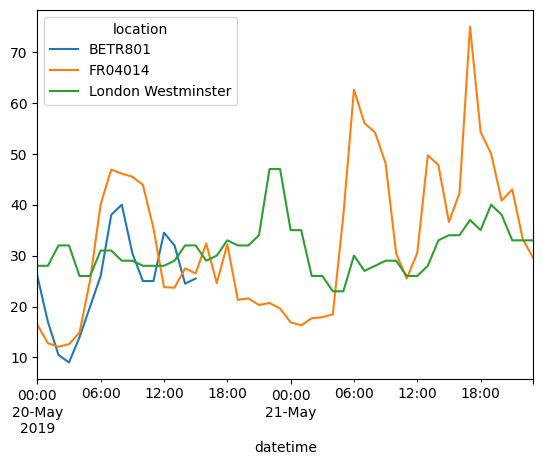

In [34]:
no_2["2019-05-20":"2019-05-21"].plot()

In [37]:
montly_median = no_2.resample("M").median()
montly_median

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-31 00:00:00+00:00,21.00,24.5,28.0
2019-06-30 00:00:00+00:00,36.25,23.7,19.0


In [38]:
import seaborn as sns

In [39]:
heatmap_data = df.pivot_table(values="value", index= "month", columns="location", aggfunc="mean")
heatmap_data.head(3)

location,BETR801,FR04014,London Westminster
month,,,
5,24.344156,27.908446,28.158433
6,31.916667,27.499272,19.581152


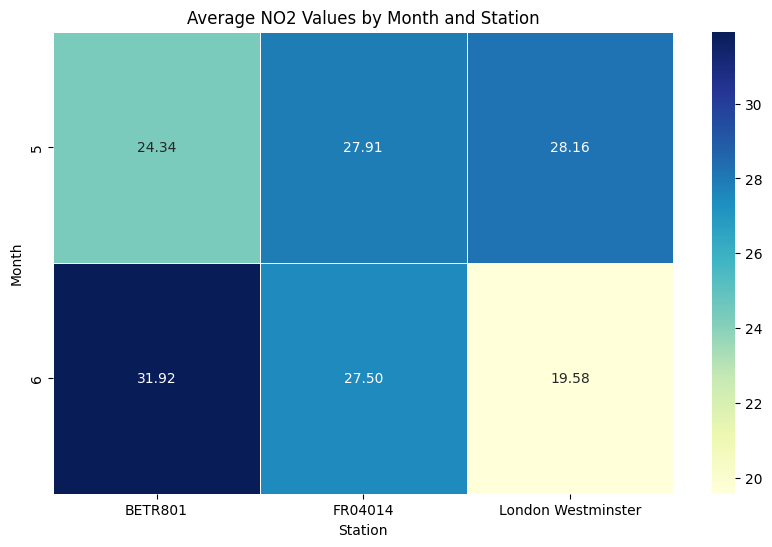

In [42]:
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", linewidths=.5, cmap="YlGnBu")
plt.title("Average NO2 Values by Month and Station")
plt.xlabel("Station")
plt.ylabel("Month")
plt.show()

In [ ]:
# exception handling
# type error , zero division error 
# oops
# Modulasation
# github

In [44]:
try:

    value = int(input("Enter a Number"))
    result = 10/ value
except ValueError:
    print("Invalid input: Please enter the number")
except ZeroDivisionError:
    print("Cannot divide by zero")

Cannot divide by zero


In [45]:
import math.py

ModuleNotFoundError: No module named 'math.py'; 'math' is not a package